In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load the Titanic dataset with a few variables for demonstration

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[["age", "fare"]],  # predictors
    data["survived"],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

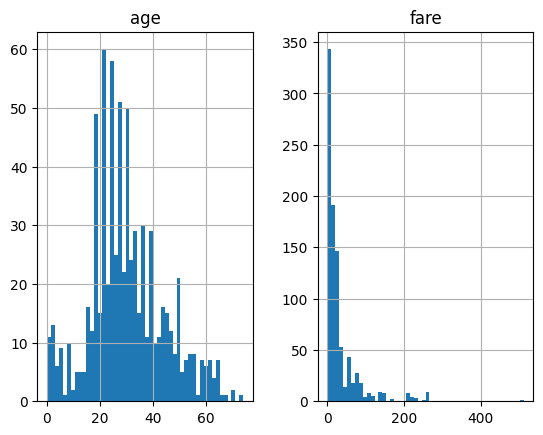

In [6]:
# let's explore the distribution of the variables
# to decide which arbitrary value to use

X_train.hist(bins=50)
plt.show()

In [7]:
# For this demo I will replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 99
# and alternatively by -1, taking advantage that Age takes only positive values

# first replace with 99
X_train["Age_99"] = X_train["age"].fillna(99)

# now replace with -1
X_train["Age_minus1"] = X_train["age"].fillna(-1)

X_train.head(15)

,age,fare,Age_99,Age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


In [8]:
# we can see a change in the variance after arbitrary value imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print("Original variable variance: ", X_train["age"].var())
print("Variance after 99 imputation: ", X_train["Age_99"].var())
print("Variance after -1 imputation: ", X_train["Age_minus1"].var())

Original variable variance:  194.16304666581863
Variance after 99 imputation:  888.7051993280913
Variance after -1 imputation:  307.94005269387753


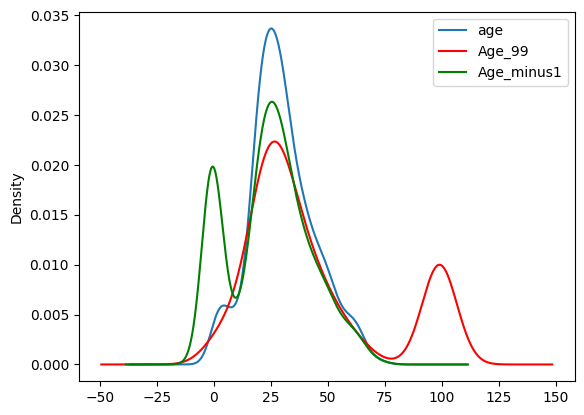

In [9]:
# we can see that the distribution has changed
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["age"].plot(kind="kde", ax=ax)

# variable imputed with 99
X_train["Age_99"].plot(kind="kde", ax=ax, color="red")

# variable imputed with -1
X_train["Age_minus1"].plot(kind="kde", ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [10]:
# we also said that arbitrary value imputation may affect the relationship
# with the other variables in the dataset, let's have a look

X_train[["fare", "age", "Age_99", "Age_minus1"]].cov()

,fare,age,Age_99,Age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
Age_99,-38.722001,194.163047,888.705199,-175.265319
Age_minus1,177.733891,194.163047,-175.265319,307.940053


In [ ]:
# We also said that mean / median imputation may affect the relationship
# with the other variables in the dataset.

# Let's have a look.

X_train[["fare", "age", "Age_median", "Age_mean"]].cov()

,fare,age,Age_median,Age_mean
fare,2199.947144,111.318279,93.569378,89.939797
age,111.318279,194.299260,194.299260,194.299260
Age_median,93.569378,194.299260,157.701547,157.094053
Age_mean,89.939797,194.299260,157.094053,157.105908


<Axes: >

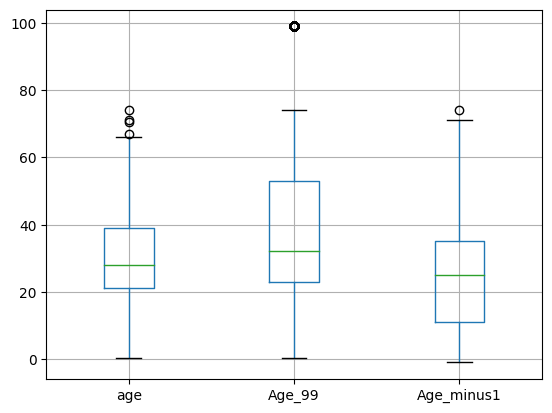

In [11]:
# Finally, I mentioned that arbitrary value imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[["age", "Age_99", "Age_minus1"]].boxplot()

In [12]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]


In [13]:
data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [14]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [16]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

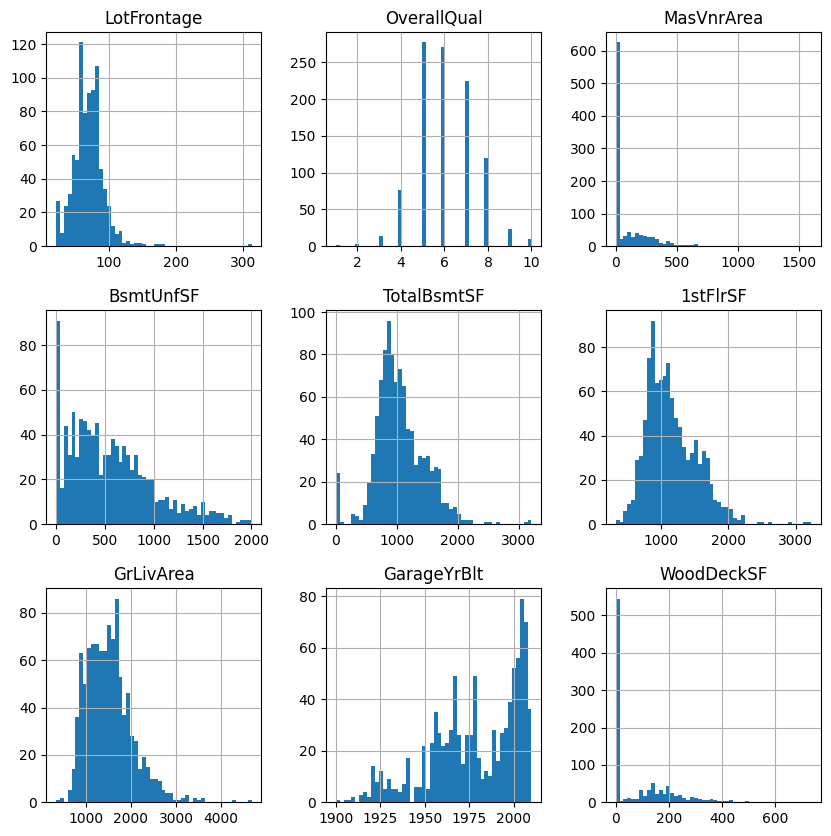

In [17]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

In [18]:
# Let's work with the variable LotFrontage first

# I create a new variable with the missing values replaced
# by 999 using the function we created above

# in this case I chose 999 to place the value at the far right end of the
# distribution. As we can see from the hist above, LotFrontAge takes values
# up to 300

X_train["LotFrontage_imputed"] = X_train["LotFrontage"].fillna(999)
X_test["LotFrontage_imputed"] = X_test["LotFrontage"].fillna(999)

In [19]:
# MasVnrArea takes values up to 1500, therefore, 999 will not
# work for this variable, as it is a normal value, I need to chose
# a bigger value: 2999

X_train.loc[:, "MasVnrArea_imputed"] = X_train["MasVnrArea"].fillna(2999)
X_test.loc[:, "MasVnrArea_imputed"] = X_test["MasVnrArea"].fillna(2999)

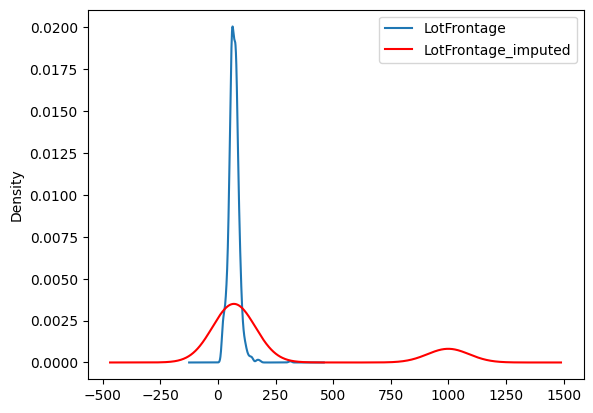

In [20]:
# let's evaluate the effect of arbitrary imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards 999

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["LotFrontage"].plot(kind="kde", ax=ax)

# variable imputed with the 999
X_train["LotFrontage_imputed"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

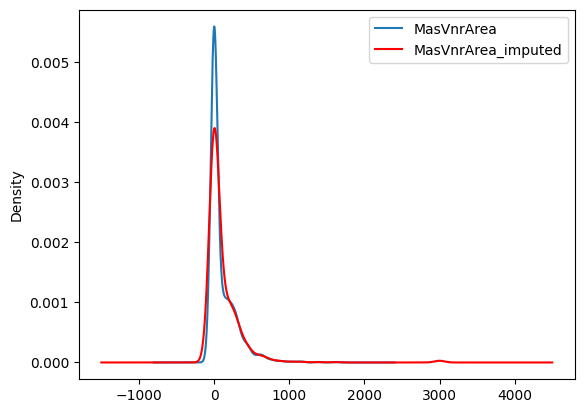

In [21]:
# For MasVnrArea, because the percentage of missing data
# was low, the change in the distribution is smaller

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["MasVnrArea"].plot(kind="kde", ax=ax)

# variable imputed with 2999
X_train["MasVnrArea_imputed"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [22]:
# similarly we can explore the effect of the imputation technique on
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

# in fact the effect is quite dramatic

print("Original Variance: ", X_train["LotFrontage"].var())
print("Variance after imputation: ", X_train["LotFrontage_imputed"].var())

Original Variance:  532.5872021885677
Variance after imputation:  130742.07296576205


In [23]:
# the same for MasnVnrArea, even though the % of NA is small, the
# arbitrary value is much bigger, which in turn affects the variance
# quite a bit

print("Original Variance: ", X_train["MasVnrArea"].var())
print("Variance after imputation: ", X_train["MasVnrArea_imputed"].var())

Original Variance:  32983.53871003956
Variance after imputation:  73677.0287993238


In [24]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,680.560330,949.657293,2908.855504,3379.793504,3919.951834,30.611717,134.741376,532.587202,758.500985
OverallQual,6.587119,1.843859,101.496976,174.614725,288.624075,224.297266,409.124216,17.902809,31.685571,-18.279174,114.055579
MasVnrArea,680.560330,101.496976,32983.538710,7540.788093,24788.765410,20865.952051,35207.851440,1203.583792,3208.924282,1582.711167,32983.538710
BsmtUnfSF,949.657293,174.614725,7540.788093,187524.082211,75133.073210,49874.491456,52033.920768,1823.065167,-1833.200962,-19005.620715,8391.605047
TotalBsmtSF,2908.855504,288.624075,24788.765410,75133.073210,168293.103282,121207.901604,86151.918290,3173.042442,12279.657062,1620.452017,25031.167060
1stFlrSF,3379.793504,224.297266,20865.952051,49874.491456,121207.901604,139865.628874,104440.129463,2009.195552,11094.055866,7485.021442,19712.756363
GrLivArea,3919.951834,409.124216,35207.851440,52033.920768,86151.918290,104440.129463,268127.660673,2738.982988,15583.954782,9634.034363,36944.868360
GarageYrBlt,30.611717,17.902809,1203.583792,1823.065167,3173.042442,2009.195552,2738.982988,624.305948,665.891118,45.643154,1588.757215
WoodDeckSF,134.741376,31.685571,3208.924282,-1833.200962,12279.657062,11094.055866,15583.954782,665.891118,16485.820460,5377.154974,2664.992748
LotFrontage_imputed,532.587202,-18.279174,1582.711167,-19005.620715,1620.452017,7485.021442,9634.034363,45.643154,5377.154974,130742.072966,1839.672367
